# Comparing EW and CapWeighted Portfolios

Load the EW and VW versions of the returns of the industry portfolios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### importing functions

In [14]:
def get_ind_file(filetype, ew=False):
    """
    Load and format the Ken French 30 Industry Portfolios files
    """
    known_types = ["returns", "nfirms", "size"]
    if filetype not in known_types:
        raise ValueError(f"filetype must be one of:{','.join(known_types)}")
    if filetype == "returns":
        name = "ew_rets" if ew else "vw_rets"
        divisor = 100
    elif filetype == "nfirms":
        name = "nfirms"
        divisor = 1
    elif filetype == "size":
        name = "size"
        divisor = 1
                         
    ind = pd.read_csv(f"./data/ind30_m_{name}.csv", header=0, index_col=0)/divisor
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_returns(ew=False):
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    return get_ind_file("returns", ew=ew)

### Sharpe Ratio Funcions

In [15]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1


def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [9]:
ind_cw = get_ind_returns(ew=False)
ind_ew = get_ind_returns(ew=True)

In [17]:
sr = pd.DataFrame({"CW": sharpe_ratio(ind_cw["1945":], 0.03, 12), "EW": sharpe_ratio(ind_ew["1945":], 0.03, 12)})

In [19]:
sr

,CW,EW
Food,0.607082,0.626427
Beer,0.508778,0.528598
Smoke,0.531916,0.608404
Games,0.339515,0.308084
Books,0.325174,0.419349
Hshld,0.503112,0.373599
Clths,0.360520,0.365794
Hlth,0.588562,0.525724
Chems,0.411192,0.497330
Txtls,0.275824,0.248401


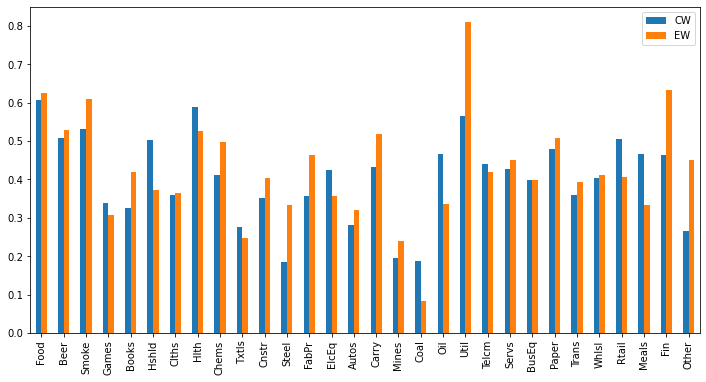

In [21]:
sr.plot.bar(figsize=(12, 6))

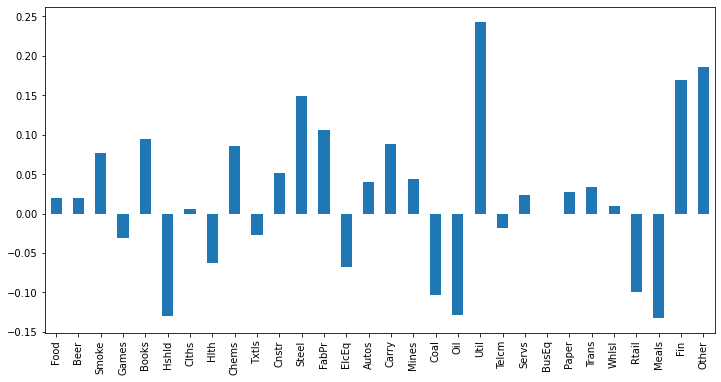

In [24]:
(sr["EW"] - sr["CW"]).plot.bar(figsize=(12,6))

In [26]:
(sr["EW"] > sr["CW"]).sum()*100/sr.shape[0]

63.333333333333336

Text(0.5, 1.0, 'Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018')

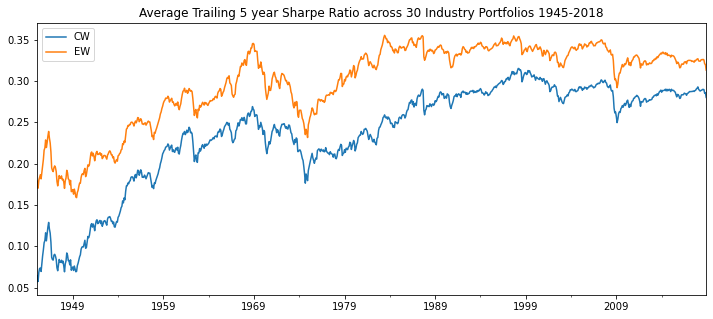

In [28]:
ax = ind_cw.rolling('1825D').apply(sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(figsize=(12,5), label="CW", legend=True)
ind_ew.rolling('1825D').apply(sharpe_ratio, raw=True, kwargs={"riskfree_rate":0.03, "periods_per_year":12}).mean(axis=1)["1945":].plot(ax=ax, label="EW", legend=True)
ax.set_title("Average Trailing 5 year Sharpe Ratio across 30 Industry Portfolios 1945-2018")